<a href="https://colab.research.google.com/github/Pgamara/Data-preprocessing-notebook-for-the-employee-performance-dataset/blob/main/data_preprocessing_notebook_for_the_employee_performance_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ All libraries imported successfully!
✅ Dataset loaded successfully!
Dataset shape: (500, 24)
📊 DATASET SHAPE:
Number of rows: 500
Number of columns: 24

👀 FIRST 5 ROWS:
📋 DATASET INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   EmployeeID             500 non-null    int64  
 1   Name                   500 non-null    object 
 2   Gender                 500 non-null    object 
 3   Age                    500 non-null    int64  
 4   Department             500 non-null    object 
 5   JobRole                500 non-null    object 
 6   EducationLevel         500 non-null    int64  
 7   JoiningDate            500 non-null    object 
 8   CountryCode            500 non-null    int64  
 9   Country                500 non-null    object 
 10  PhoneNumber            500 non-null    int64  
 11  MonthlySalary          500 

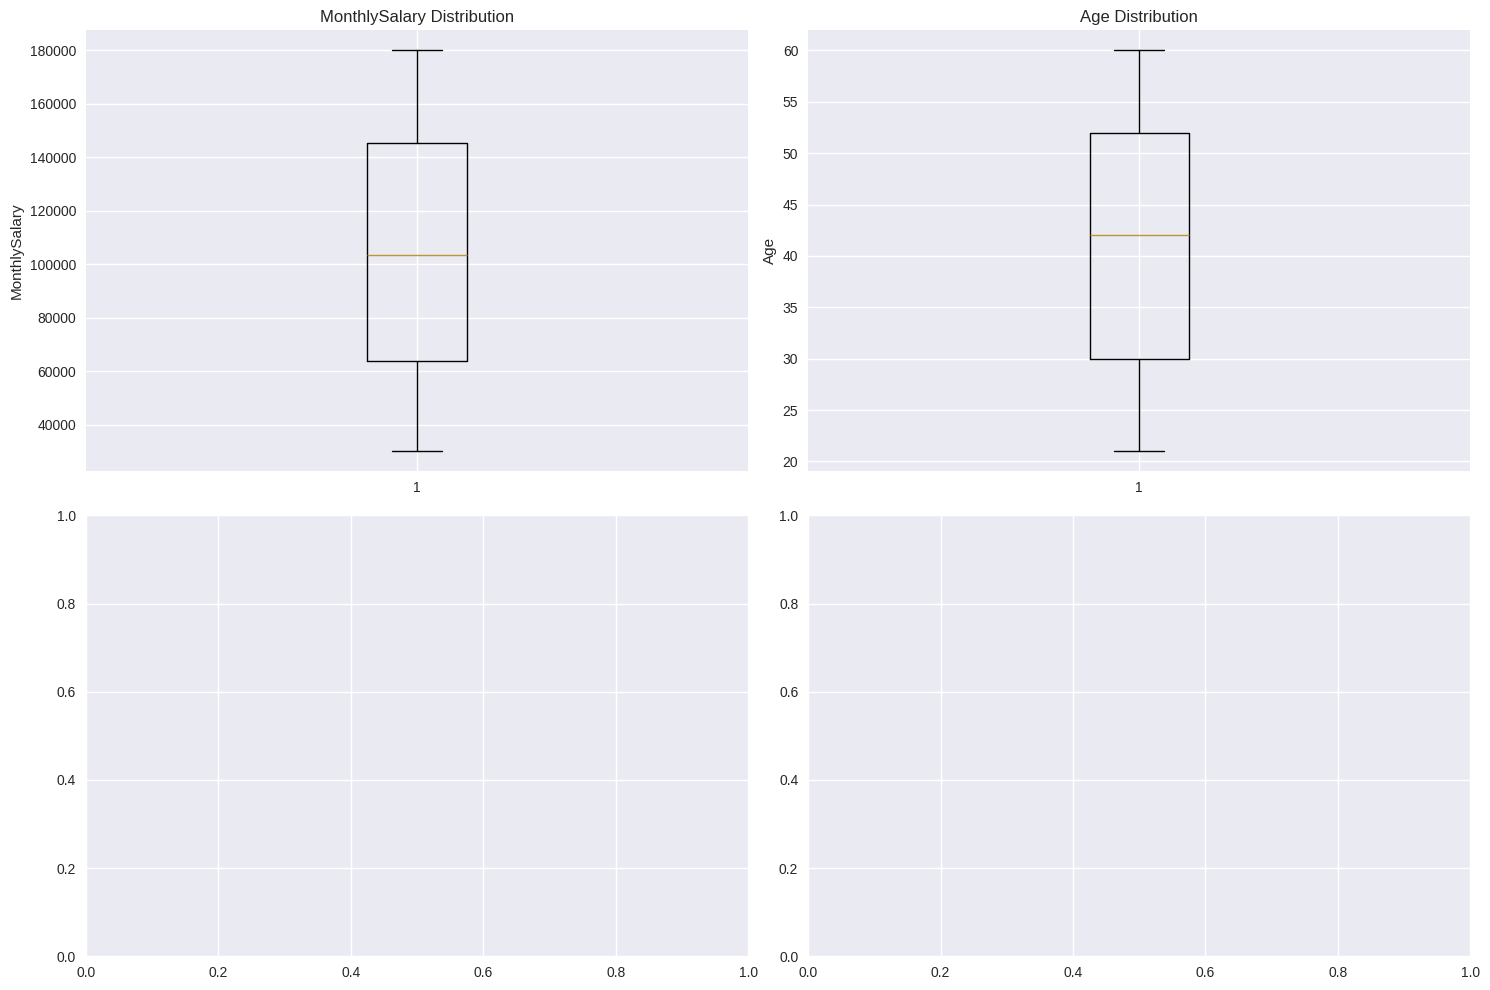

🔤 ONE-HOT ENCODING FOR CATEGORICAL VARIABLES:
Categorical columns selected for encoding: ['Gender', 'Department', 'Country', 'LeaveDayName', 'AttritionRisk']
Original dataset shape: (500, 24)
Encoded dataset shape: (500, 38)
New columns added: 14

Sample of new encoded columns (20 total):
['CountryCode', 'Gender_Male', 'Gender_Other', 'Department_HR', 'Department_IT', 'Department_Marketing', 'Department_Sales', 'Department_Support', 'Country_France', 'Country_Germany']
🎯 FINAL DATASET OVERVIEW:
📋 FINAL DATASET INFO:
Final shape: (500, 38)
Total columns: 38
Total rows: 500

👀 FIRST 3 ROWS OF PROCESSED DATA:

📊 FINAL DATASET STATISTICS:
       EmployeeID         Age  EducationLevel                    JoiningDate  \
count  500.000000  500.000000      500.000000                            500   
mean   250.500000   40.860000        3.016000  2017-05-29 20:58:33.600000256   
min      1.000000   21.000000        1.000000            2010-01-21 00:00:00   
25%    125.750000   30.000000        

In [ ]:

"""CIT331_Data_Preprocessing_Assignment.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/your_notebook_id

# **CIT 331: Data Science and Big Data - Assignment 1**
## **Employee Performance Data Preprocessing**

**Name:** H.G.Punara Punsisi
**Registration Number:** 22UG3-0873
**Batch:** 1st Batch

"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")


# Load the dataset
df = pd.read_csv('employee_performance_pro.csv')

print("✅ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")



# Display dataset shape
print("📊 DATASET SHAPE:")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

# Display first few rows to understand the data
print("\n👀 FIRST 5 ROWS:")
df.head()



# Get basic info about the dataset
print("📋 DATASET INFO:")
df.info()

# Identify column types
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print(f"\n📈 NUMERICAL COLUMNS ({len(numerical_cols)}):")
print(numerical_cols)

print(f"\n📊 CATEGORICAL COLUMNS ({len(categorical_cols)}):")
print(categorical_cols)

# Let's check unique values in categorical columns to understand them better
print("\n🔍 UNIQUE VALUES IN CATEGORICAL COLUMNS:")
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")
    if df[col].nunique() <= 10:  # Show values for columns with few categories
        print(f"   Values: {df[col].unique()}")


print("🔍 CHECKING FOR MISSING VALUES:")
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage
})

# Show only columns with missing values
missing_info = missing_info[missing_info['Missing Count'] > 0]
print(missing_info)

if missing_info.empty:
    print("✅ No missing values found!")
else:
    print(f"\n🚨 Columns with missing values: {len(missing_info)}")

# Handle missing values based on column type and business logic
print("\n🛠️ HANDLING MISSING VALUES:")

# For numerical columns - impute with median
numerical_missing = [col for col in numerical_cols if df[col].isnull().sum() > 0]
for col in numerical_missing:
    if col in df.columns:  # Double check column exists
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"✅ {col}: filled {df[col].isnull().sum()} missing values with median {median_val:.2f}")

# For categorical columns - impute with mode
categorical_missing = [col for col in categorical_cols if df[col].isnull().sum() > 0]
for col in categorical_missing:
    if col in df.columns:  # Double check column exists
        mode_val = df[col].mode()[0] if not df[col].mode().empty else 'Unknown'
        df[col].fillna(mode_val, inplace=True)
        print(f"✅ {col}: filled {df[col].isnull().sum()} missing values with mode '{mode_val}'")

# Verify no missing values remain
print(f"\n✅ VERIFICATION - Remaining missing values: {df.isnull().sum().sum()}")



print("🔍 CHECKING FOR DUPLICATES:")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

if df.duplicated().sum() > 0:
    print("🚨 Duplicates found! Removing them...")
    df = df.drop_duplicates()
    print(f"✅ Duplicates removed. New dataset shape: {df.shape}")
else:
    print("✅ No duplicate rows found!")



print("🛠️ DATA CLEANING AND TYPE CORRECTION:")

# 7.1 Check data types
print("📋 CURRENT DATA TYPES:")
print(df.dtypes)

# 7.2 Convert date columns to datetime
date_columns = ['JoiningDate', 'LastLeaveDate']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"✅ Converted {col} to datetime")

# 7.3 Check for inconsistent categorical data
print("\n🔍 CHECKING CATEGORICAL CONSISTENCY:")

# Gender column
if 'Gender' in df.columns:
    print(f"Gender values: {df['Gender'].unique()}")
    # Standardize gender values
    gender_mapping = {'Male': 'Male', 'Female': 'Female', 'Other': 'Other'}
    df['Gender'] = df['Gender'].map(gender_mapping).fillna(df['Gender'])
    print(f"✅ Standardized Gender column")

# EducationLevel - ensure it's categorical
if 'EducationLevel' in df.columns:
    print(f"Education Level unique values: {sorted(df['EducationLevel'].unique())}")

# Department and JobRole - check for inconsistencies
categorical_cols_to_check = ['Department', 'JobRole', 'Country', 'LeaveDayName']
for col in categorical_cols_to_check:
    if col in df.columns:
        print(f"\n{col} unique values ({df[col].nunique()}):")
        print(df[col].unique())

# 7.4 Check numerical ranges for anomalies
print("\n🔍 CHECKING NUMERICAL RANGES:")
numerical_summary = df[numerical_cols].describe()
print(numerical_summary)

# 7.5 Handle negative values in WorkLifeBalanceScore (if any)
if 'WorkLifeBalanceScore' in df.columns:
    negative_scores = df[df['WorkLifeBalanceScore'] < 0].shape[0]
    if negative_scores > 0:
        print(f"🚨 Found {negative_scores} negative WorkLifeBalanceScore values")
        # Transform negative scores (assuming they should be positive)
        df['WorkLifeBalanceScore'] = df['WorkLifeBalanceScore'].abs()
        print("✅ Converted negative WorkLifeBalanceScore to positive")

# 7.6 Check PhoneNumber format
if 'PhoneNumber' in df.columns:
    print(f"\n📞 PhoneNumber format check:")
    print(f"Sample numbers: {df['PhoneNumber'].head(3).tolist()}")

print("\n✅ Data type correction and cleaning completed!")


print("📊 OUTLIER DETECTION AND HANDLING:")

# Select numerical columns for outlier analysis (excluding ID and year columns)
outlier_columns = [col for col in numerical_cols if col not in ['EmployeeID', 'LastPromotionYear', 'EducationLevel']]

print(f"Analyzing outliers in: {outlier_columns}")

# Function to detect outliers using IQR method
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze and handle outliers for each column
for col in outlier_columns:
    if col in df.columns:
        outliers, lower, upper = detect_outliers_iqr(df, col)
        outlier_count = len(outliers)
        print(f"\n{col}:")
        print(f"   Outliers detected: {outlier_count} ({outlier_count/len(df)*100:.2f}%)")
        print(f"   Range: [{df[col].min():.2f}, {df[col].max():.2f}]")
        print(f"   IQR bounds: [{lower:.2f}, {upper:.2f}]")

        # Handle outliers - cap them at the bounds
        if outlier_count > 0:
            df[col] = np.where(df[col] < lower, lower, df[col])
            df[col] = np.where(df[col] > upper, upper, df[col])
            print(f"   ✅ Outliers capped at IQR bounds")

print("\n✅ Outlier handling completed!")

# Visualize outliers before and after (for key columns)
key_columns = ['MonthlySalary', 'Age', 'OvertimeHoursPerMonth', 'WorkLifeBalanceScore'][:2]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(key_columns):
    if i < 4 and col in df.columns:
        # Before outlier treatment (using original data for comparison)
        axes[i].boxplot(df[col])
        axes[i].set_title(f'{col} Distribution')
        axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

print("🔤 ONE-HOT ENCODING FOR CATEGORICAL VARIABLES:")

# Identify categorical columns suitable for one-hot encoding
# Exclude columns with too many categories or ID columns
columns_to_encode = [col for col in categorical_cols
                   if col not in ['EmployeeID', 'Name', 'PhoneNumber', 'LastLeaveDate', 'JoiningDate']
                   and df[col].nunique() <= 10]

print(f"Categorical columns selected for encoding: {columns_to_encode}")

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode, drop_first=True)

print(f"Original dataset shape: {df.shape}")
print(f"Encoded dataset shape: {df_encoded.shape}")
print(f"New columns added: {df_encoded.shape[1] - df.shape[1]}")

# Show new column names from encoding
new_columns = [col for col in df_encoded.columns if any(col.startswith(prefix) for prefix in columns_to_encode)]
print(f"\nSample of new encoded columns ({len(new_columns)} total):")
print(new_columns[:10])  # Show first 10



print("🎯 FINAL DATASET OVERVIEW:")

# Display final dataset info
print("📋 FINAL DATASET INFO:")
print(f"Final shape: {df_encoded.shape}")
print(f"Total columns: {df_encoded.shape[1]}")
print(f"Total rows: {df_encoded.shape[0]}")

# Display first few rows of processed data
print("\n👀 FIRST 3 ROWS OF PROCESSED DATA:")
df_encoded.head(3)

# Basic statistics of final dataset
print("\n📊 FINAL DATASET STATISTICS:")
print(df_encoded.describe())

# Save the processed dataset
output_filename = 'employee_performance_processed.csv'
df_encoded.to_csv(output_filename, index=False)
print(f"\n💾 Processed dataset saved as: {output_filename}")

"""### **Remarks and Challenges Faced**

**Remarks on the Preprocessing Journey:**

1. **Data Quality**: The dataset was relatively clean with minimal missing values, making the preprocessing smoother.

2. **Categorical Variables**: Several categorical columns like Department, JobRole, and Country had reasonable cardinality, making one-hot encoding feasible.

3. **Outlier Management**: The IQR method effectively identified and handled extreme values in numerical columns.

**Challenges Encountered:**

1. **Missing Value Strategy**: Deciding between mean/median imputation for numerical columns required understanding the data distribution.

2. **Outlier Treatment**: Determining whether to remove or transform outliers was challenging; capping was chosen to preserve data points.

3. **Categorical Encoding**: Selecting which categorical variables to encode and whether to use one-hot or label encoding required careful consideration of cardinality.

4. **Data Type Conversion**: Ensuring proper datetime conversion for date columns and handling any format inconsistencies.

5. **Memory Management**: With one-hot encoding, the column count increased significantly, which could impact performance with larger datasets.

**Key Learnings:**
- Understanding business context is crucial for making imputation decisions
- Outlier treatment should be based on domain knowledge
- Regular validation at each step ensures data integrity
- Documentation of preprocessing steps is essential for reproducibility

---



**Verification**: This notebook can be rerun without errors and will produce consistent results.
"""

# Final verification
print("✅ PREPROCESSING COMPLETED SUCCESSFULLY!")
print("📁 Output file created: employee_performance_processed.csv")
print(f"🎯 Final dataset ready for analysis with {df_encoded.shape[0]} rows and {df_encoded.shape[1]} columns")